In [22]:
#MNIST dataset

#import  the necessary libraries for the app

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [23]:
#load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
#normalize the dataset
x_train,x_test = X_train/255.0, X_test/255.0

In [25]:
#reshape the data for CNN
x_train_cnn=x_train.reshape(-1,28,28,1)
x_test_cnn=x_test.reshape(-1,28,28,1)
#one_hot encodeing for ann and cnn in data
y_train_oh=to_categorical(y_train,10)
y_test_oh=to_categorical(y_test,10)
# [0001000000]

In [26]:
#build an ANN Model
# the images into 28*28 for the 1D vector
ann_model=Sequential([
    Flatten(input_shape=(28,28)),


#first hidden layer
Dense(128,activation='relu'),
#second hidden layer
Dense(64,activation='relu'),
Dense(10,activation='softmax'),
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
#compile the model
ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
# Train the model
ann_model.fit(x_train, y_train_oh, epochs=5, batch_size=32, validation_data=(x_test, y_test_oh))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8778 - loss: 0.4170 - val_accuracy: 0.9591 - val_loss: 0.1286
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9673 - loss: 0.1065 - val_accuracy: 0.9680 - val_loss: 0.1021
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9771 - loss: 0.0722 - val_accuracy: 0.9739 - val_loss: 0.0871
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9842 - loss: 0.0502 - val_accuracy: 0.9768 - val_loss: 0.0786
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9869 - loss: 0.0402 - val_accuracy: 0.9756 - val_loss: 0.0862


In [31]:
#train ANN model
ann_model.fit(x_train,y_train_oh,epochs=5, batch_size=32, validation_data=(x_test,y_test_oh))

#Build the CNN Model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
#pool layer
MaxPooling2D((2,2)),

Conv2D(64,(3,3), activation='relu'),
MaxPooling2D((2,2)),
Flatten(),
Dense(64, activation= 'relu'),

Dense(10, activation= 'softmax')
])


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9942 - loss: 0.0166 - val_accuracy: 0.9786 - val_loss: 0.0958
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9960 - loss: 0.0119 - val_accuracy: 0.9785 - val_loss: 0.0957
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9951 - loss: 0.0134 - val_accuracy: 0.9775 - val_loss: 0.1169
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9952 - loss: 0.0141 - val_accuracy: 0.9776 - val_loss: 0.1134
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9964 - loss: 0.0099 - val_accuracy: 0.9748 - val_loss: 0.1225


In [32]:
#Build the CNN Model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
#pool layer
MaxPooling2D((2,2)),

# Corrected 'avtivation' to 'activation'
Conv2D(64,(3,3), activation='relu'),
MaxPooling2D((2,2)),
Flatten(),
Dense(64, activation= 'relu'),

Dense(10, activation= 'softmax')
])

#complie our model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Train the CNN model
cnn_model.fit(x_train_cnn, y_train_oh, epochs=5, batch_size=32, validation_data=(x_test_cnn, y_test_oh))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8973 - loss: 0.3220 - val_accuracy: 0.9825 - val_loss: 0.0541
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9846 - loss: 0.0495 - val_accuracy: 0.9871 - val_loss: 0.0397
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.9897 - val_loss: 0.0332
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 40ms/step - accuracy: 0.9928 - loss: 0.0228 - val_accuracy: 0.9912 - val_loss: 0.0260
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 32ms/step - accuracy: 0.9953 - loss: 0.0148 - val_accuracy: 0.9893 - val_loss: 0.0326


In [36]:
#Build the model with KNN

x_train_knn = x_train.reshape(-1,28*28) # Changed X_train to x_train
x_test_knn = x_test.reshape(-1,28*28)

#standardization of thr data
scaler = StandardScaler()
x_train_knn = scaler.fit_transform(x_train_knn)
x_test_knn = scaler.transform(x_test_knn)

#create the model
knn_model = KNeighborsClassifier(n_neighbors=3)

In [37]:
#train the model
knn_model.fit(x_train_knn,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
# Fix typo in variable name and calculation
knn_accuracy = knn_model.score(x_test_knn, y_test)
print(f"KNN Accuracy: {knn_accuracy*100:.2f}%")

KNN Accuracy: 94.52%


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


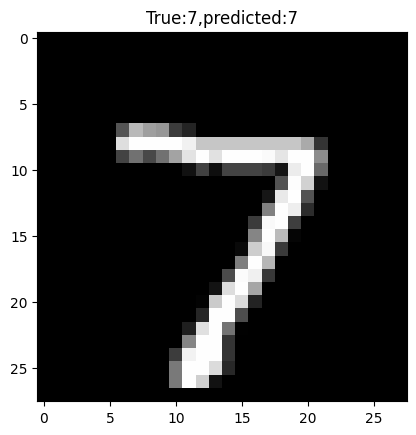

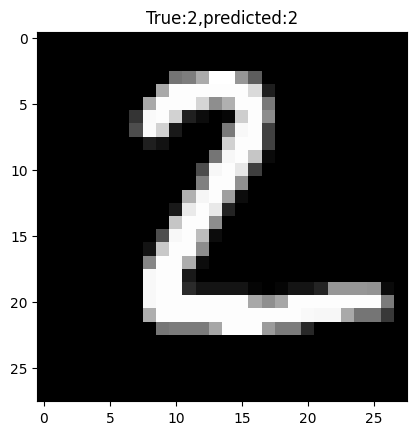

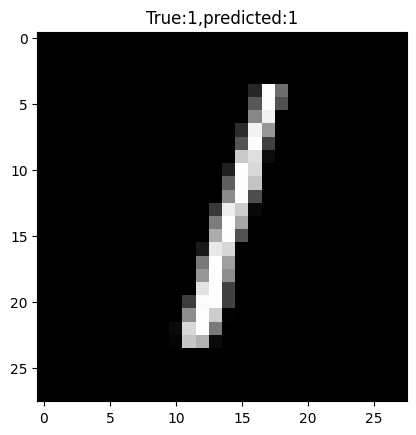

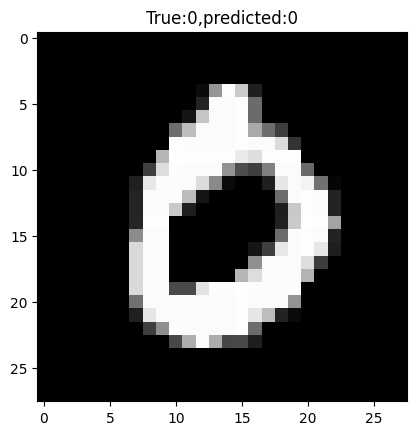

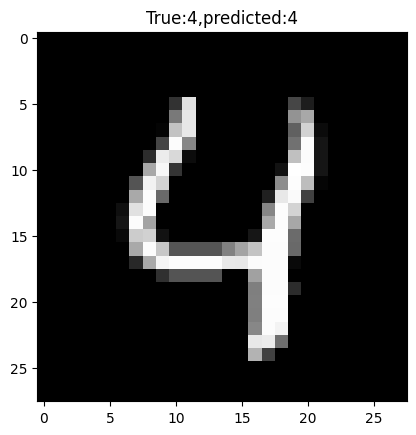

In [39]:
#predicccion with cnn
predictions = cnn_model.predict(x_test_cnn) # Fix typo: prediction -> predictions

for i in range(5):
  plt.imshow(x_test[i], cmap='gray') # Change 'grey' to 'gray'
  plt.title(f"True:{y_test[i]},predicted:{np.argmax(predictions[i])}")
  plt.show()